In [1]:
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.stats as stats
from mpl_toolkits.basemap import Basemap, addcyclic
import time
%matplotlib inline

In [2]:
pLevelPath="/Users/haukeblanken/Documents/UVic/Courses/EOS562/Exercises/Jan14/eraint_plevel_1980_2009_MLY.nc"
pLevel=netCDF4.Dataset(pLevelPath,"r")

In [3]:
surfPath="/Users/haukeblanken/Documents/UVic/Courses/EOS562/Exercises/Jan14/eraint_surface_1980_2009.nc"
surf=netCDF4.Dataset(surfPath,"r")

Figure 2.4

In [4]:
geop=pLevel.variables["z"][:]/9.81
times=pLevel.variables["time"][:]*3600.-(70.*365.+17.)*86400.
lon=pLevel.variables["longitude"][:]
lat=pLevel.variables["latitude"][:]
level=pLevel.variables["level"][:]

In [25]:
pyTimes=list()
for i in range(len(times)):
    pyTimes.append(time.gmtime(times[i]))
    
month=times*0.
counter=0
for dt in pyTimes:
    month[counter]=dt.tm_mon
    counter=counter+1
    
DJFind1=np.union1d(mlab.find(month==12.),mlab.find(month==1.)); DJFind=np.union1d(DJFind1,mlab.find(month==2.))
JJAind1=np.union1d(mlab.find(month==6.),mlab.find(month==7.)); JJAind=np.union1d(JJAind1,mlab.find(month==8.))
levelInd=mlab.find(level==900.)

In [26]:
DJFgeop900=np.mean(geop[DJFind,levelInd,:,:],axis=0)
JJAgeop900=np.mean(geop[JJAind,levelInd,:,:],axis=0)
DiffGeop900=DJFgeop900-JJAgeop900

In [27]:
m=Basemap(llcrnrlon=0,llcrnrlat=-90,urcrnrlon=360,urcrnrlat=90,projection='mill')

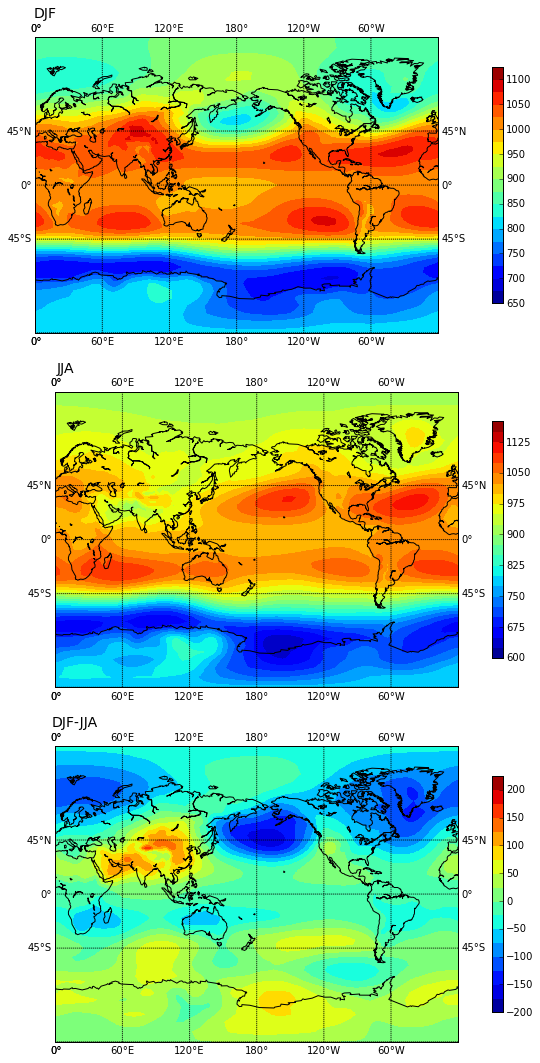

In [28]:
cInt=25.

fig=plt.figure(figsize=(12,18))
ax1=fig.add_subplot(3,1,1)
m.drawcoastlines()
clevs=np.arange(np.floor(np.min(DJFgeop900)/50.)*50.,np.ceil(np.max(DJFgeop900)/50.+1.)*50.,cInt)
DJFgeop9002,lon2=addcyclic(DJFgeop900,lon)
lons,lats=np.meshgrid(lon2,lat)
m.contourf(lons,lats,DJFgeop9002,levels=clevs,latlon=True)
cbar=plt.colorbar(pad=0.08,shrink=0.8)
m.drawparallels(np.arange(-90.,90.,45.),labels=[True,True,True,True,True])
m.drawmeridians(np.arange(0.,360.,60.),labels=[False,True,True,True,True,True,False])
ax1.set_title('DJF',position=[0.025,1.05],fontsize=14)

ax2=fig.add_subplot(3,1,2)
m.drawcoastlines()
clevs=np.arange(np.floor(np.min(JJAgeop900)/50.)*50.,np.ceil(np.max(JJAgeop900)/50.+1.)*50.,cInt)
JJAgeop9002,lon2=addcyclic(JJAgeop900,lon)
lons,lats=np.meshgrid(lon2,lat)
m.contourf(lons,lats,JJAgeop9002,levels=clevs,latlon=True)
cbar=plt.colorbar(pad=0.05,shrink=0.8)
m.drawparallels(np.arange(-90.,90.,45.),labels=[True,True,True,True,True])
m.drawmeridians(np.arange(0.,360.,60.),labels=[False,True,True,True,True,True,False])
ax2.set_title('JJA',position=[0.025,1.05],fontsize=14)

ax3=fig.add_subplot(3,1,3)
m.drawcoastlines()
clevs=np.arange(np.floor(np.min(DiffGeop900)/50.)*50.,np.ceil(np.max(DiffGeop900)/50.+1.)*50.,cInt)
DiffGeop9002,lon2=addcyclic(DiffGeop900,lon)
lons,lats=np.meshgrid(lon2,lat)
m.contourf(lons,lats,DiffGeop9002,levels=clevs,latlon=True)
cbar=plt.colorbar(pad=0.05,shrink=0.8)
m.drawparallels(np.arange(-90.,90.,45.),labels=[True,True,True,True,True])
m.drawmeridians(np.arange(0.,360.,60.),labels=[False,True,True,True,True,True,False])
ax3.set_title('DJF-JJA',position=[0.05,1.05],fontsize=14)

#fig.tight_layout()

Figure 2.10a

In [29]:
u=pLevel.variables["u"][:]

In [30]:
uDJFt=np.mean(u[DJFind,:,:,:],axis=0)
uDJF=np.mean(uDJFt[:,:,:],axis=-1)

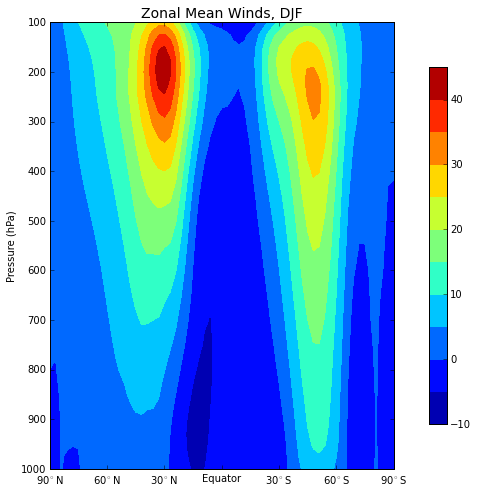

In [31]:
cInt=5.
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
clevs=np.arange(np.floor(np.min(uDJF)/cInt)*cInt,np.ceil(np.max(uDJF)/cInt+1.)*cInt,cInt)
x,z=np.meshgrid(lat,level)
cs=ax.contourf(x,z,uDJF,levels=clevs)
cbar=plt.colorbar(cs,pad=0.08,shrink=0.8)
xlabels=['90$^\circ$N','60$^\circ$N','30$^\circ$N','Equator','30$^\circ$S','60$^\circ$S','90$^\circ$S']
plt.xticks(np.arange(90.,-91.,-30),xlabels)
ax.set_ylabel('Pressure (hPa)')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
ax.set_title('Zonal Mean Winds, DJF',fontsize=14)

Figure 2.13a

In [32]:
v=pLevel.variables["v"][:]

In [33]:
uDJF=np.mean(u[DJFind,levelInd,:,:],axis=0)
vDJF=np.mean(v[DJFind,levelInd,:,:],axis=0)

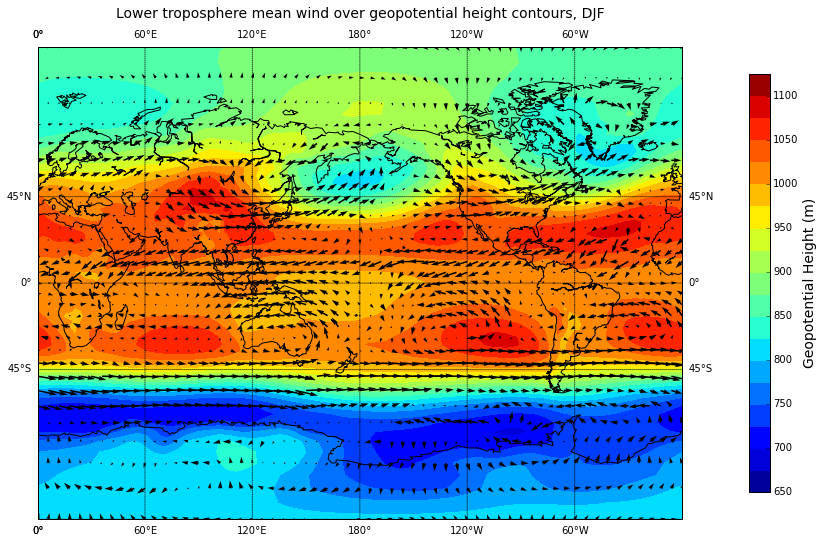

In [34]:
cInt=25.
arrowSpace=2

fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot(1,1,1)
m.drawcoastlines()
clevs=np.arange(np.floor(np.min(DJFgeop900)/50.)*50.,np.ceil(np.max(DJFgeop900)/50.+1.)*50.,cInt)
DJFgeop9002,lon2=addcyclic(DJFgeop900,lon)
lons,lats=np.meshgrid(lon2,lat)
x,y=m(lons,lats)
m.contourf(lons,lats,DJFgeop9002,levels=clevs,latlon=True)
cbar=plt.colorbar(pad=0.08,shrink=0.5)
cbar.set_label(label='Geopotential Height (m)',fontsize=14)
m.drawparallels(np.arange(-90.,90.,45.),labels=[True,True,True,True,True])
m.drawmeridians(np.arange(0.,360.,60.),labels=[False,True,True,True,True,True,False])

m.quiver(x[::arrowSpace,::arrowSpace],y[::arrowSpace,::arrowSpace],uDJF[::arrowSpace,::arrowSpace],vDJF[::arrowSpace,::arrowSpace])#,latlon=True)

ax.set_title('Lower troposphere mean wind over geopotential height contours, DJF',position=[0.5,1.05],fontsize=14)

Figure 3.3

In [16]:
pLevel.close()

In [17]:
SST=surf.variables["sst"][:]
times=surf.variables["time"][:]*3600.-(70.*365.+17.)*86400.
lon=surf.variables["longitude"][:]
lat=surf.variables["latitude"][:]

In [19]:
pyTimes=list()
for i in range(len(times)):
    pyTimes.append(time.gmtime(times[i]))
    
year=times*0.
counter=0
for dt in pyTimes:
    year[counter]=dt.tm_year
    counter=counter+1
    
startInd=mlab.find(year==1995)[0]; endInd=mlab.find(year==2003)[0]
startLon=mlab.find(lon>=120.)[0]; endLon=mlab.find(lon<=270)[-1]
latInd=mlab.find(lat==0)

In [21]:
sstPlot=SST[startInd:endInd+1,latInd,startLon:endLon+1]
t=times[startInd:endInd+1]
lon2=lon[startLon:endLon+1]

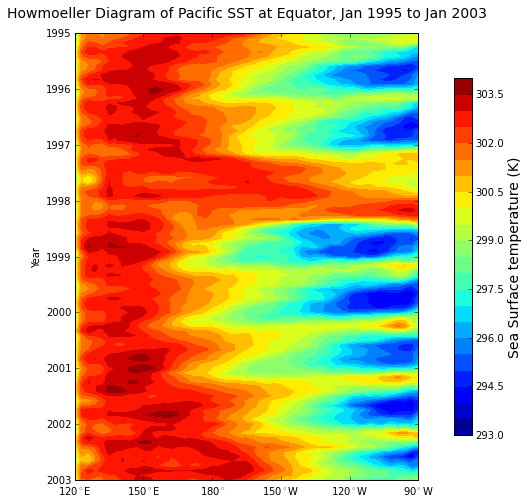

In [23]:
cInt=0.5
ylabels=np.arange(1995,2004,1)
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
clevs=np.arange(np.floor(np.min(sstPlot)/cInt)*cInt,np.ceil(np.max(sstPlot)/cInt+1.)*cInt,cInt)
x,t2=np.meshgrid(lon2,t)
cs=ax.contourf(x,t2,sstPlot[:,0,:],levels=clevs)
cbar=plt.colorbar(cs,pad=0.08,shrink=0.8)
cbar.set_label(label='Sea Surface temperature (K)',fontsize=14)
xlabels=['120$^\circ$E','150$^\circ$E','180$^\circ$','150$^\circ$W','120$^\circ$W','90$^\circ$W']
plt.xticks(np.arange(120.,271.,30.),xlabels)
plt.yticks(np.linspace(np.min(t2),np.max(t2),9),ylabels)
ax.set_ylabel('Year')
plt.gca().invert_yaxis()
ax.set_title('Howmoeller Diagram of Pacific SST at Equator, Jan 1995 to Jan 2003',position=[0.5,1.025],fontsize=14)

In [24]:
surf.close()